### Bank Marketing 
## Problem Statment
The data set is based off the direct marketing campaigns of a banking institution. These marketing campaigns were based on phone calls. More than one contact to a client was required, in order to know if the product (bank term deposit) was subscribed by a client or not.

The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).

The dataset contains 21 columns including the output (y). I am going to discard the output column and use the remaining columns to find the most relatable independent variables (x) that will be able to predict if a customer will subscribe to a bank deposit or not.

## Project Approach
* Data exploration

* Feature engineering

* Building training/validation/test samples

* Model selection

* Model evaluation

## Project Definition
The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("/Users/joshnolan/programmingProjects/Client-Bank-Term-Deposit-ML-/data/bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.groupby("y").size()

y
no     36548
yes     4640
dtype: int64

In [8]:
#ASSIGN INTEGER TO YES AND NO. YES == 1, NO == 0
df['output_label'] = (df.y =='yes').astype('int')

In [9]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,output_label
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


In [10]:
def calc_prevalence(y_actual) -> float:
    """
    y_actual: array-like
        The output_label values (1 or 0).
    Returns the prevalence of clients that subscribed.
    """
    return sum(y_actual) / len(y_actual)

prevalence = calc_prevalence(df['output_label'].values)
print(f"Prevalence of the positive class is: {prevalence:.3g}. Therefore {prevalence*100:.3g}% of clients subscribed to the bank deposit.")


Prevalence of the positive class is: 0.113. Therefore 11.3% of clients subscribed to the bank deposit.


In [11]:
print('Number of columns:',len(df.columns))

Number of columns: 22


In [12]:
import pandas as pd

def find_unique_values(df: pd.DataFrame) -> None:
    """
    Prints unique values for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("The input must be a pandas DataFrame.")
    
    for col in df.columns:
        unique_values = df[col].unique()
        num_unique = len(unique_values)

        # Print the column name
        print(col)

        # Print the values if unique count is less than 30; otherwise print the count
        if num_unique < 30:
            print(unique_values)
        else:
            print(f"{num_unique} unique values")
        print()  # For better readability between columns

find_unique_values(df)

age
78 unique values

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital
['married' 'single' 'divorced' 'unknown']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default
['no' 'unknown' 'yes']

housing
['no' 'yes' 'unknown']

loan
['no' 'yes' 'unknown']

contact
['telephone' 'cellular']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

duration
1544 unique values

campaign
42 unique values

pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

previous
[0 1 2 3 4 5 6 7]

poutcome
['nonexistent' 'failure' 'success']

emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.9

We will discard duration as this attribute highly affects the output target (e.g if duration = 0 then y='no') yet the duration is not known before a call is performed. Also, after the end of a call, y is obviously known. We want to predict if a customer will subscribe to a bank deposit WITHOUT needing to call them. So this input should only be included for benchmark purposes. 

### Data Visualisation 

#### Numerical Features

In [13]:
#Numerical columns found from df.info()
cols_num = ['age','campaign','pdays','previous',
            'emp.var.rate','cons.price.idx','cons.conf.idx', 
            'nr.employed','euribor3m']

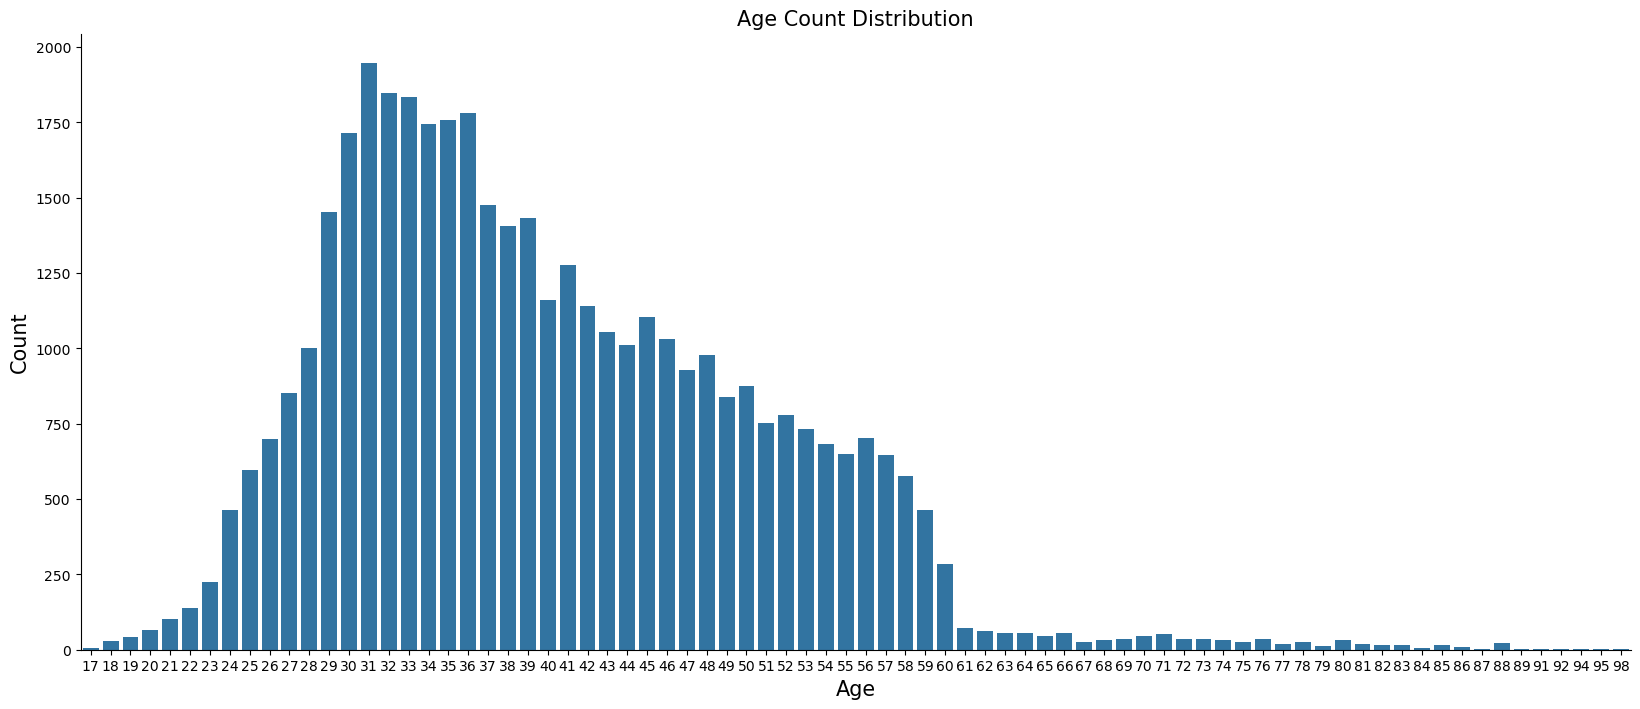

In [14]:
#Age: create a count plot to visualize the distribution of the 'age' variable
warnings.filterwarnings('ignore')
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.show()

Our biggest customer base is from ages 29-40. This is useful info for the marketing team to curate age relevant advertisement and even product team to curate new products most relevant to this age group.

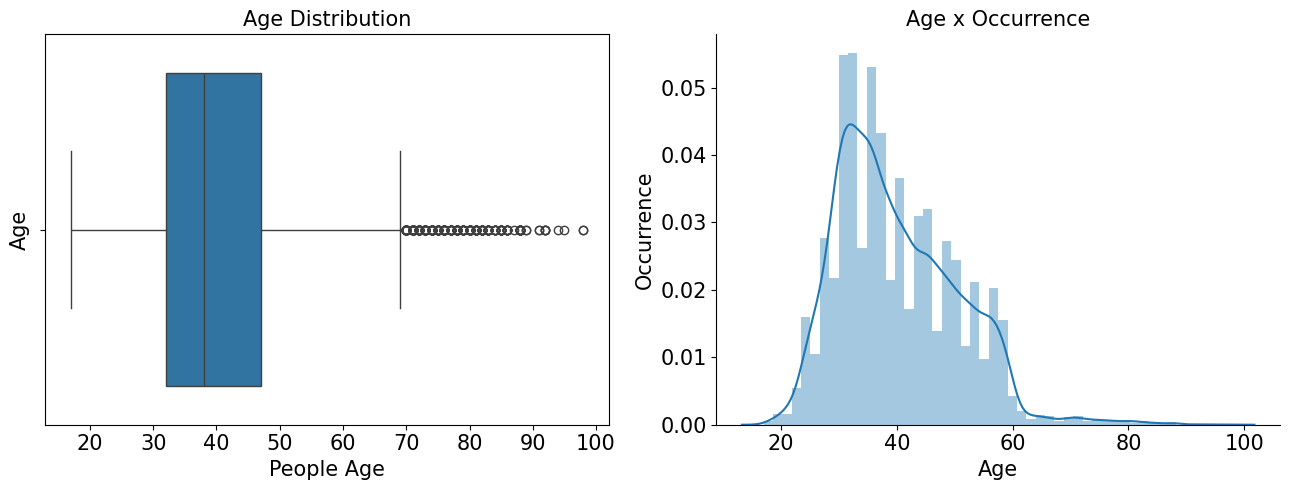

In [15]:
# This code generates two side-by-side visualizations: a boxplot and a distribution plot
# for the 'age' variable in the dataset. The boxplot illustrates the distribution and 
# variability of ages, while the distribution plot shows the frequency of occurrence 
# of different ages. 
plt.close()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.boxplot(x='age', data=df[cols_num], orient='v', ax=ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age x Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


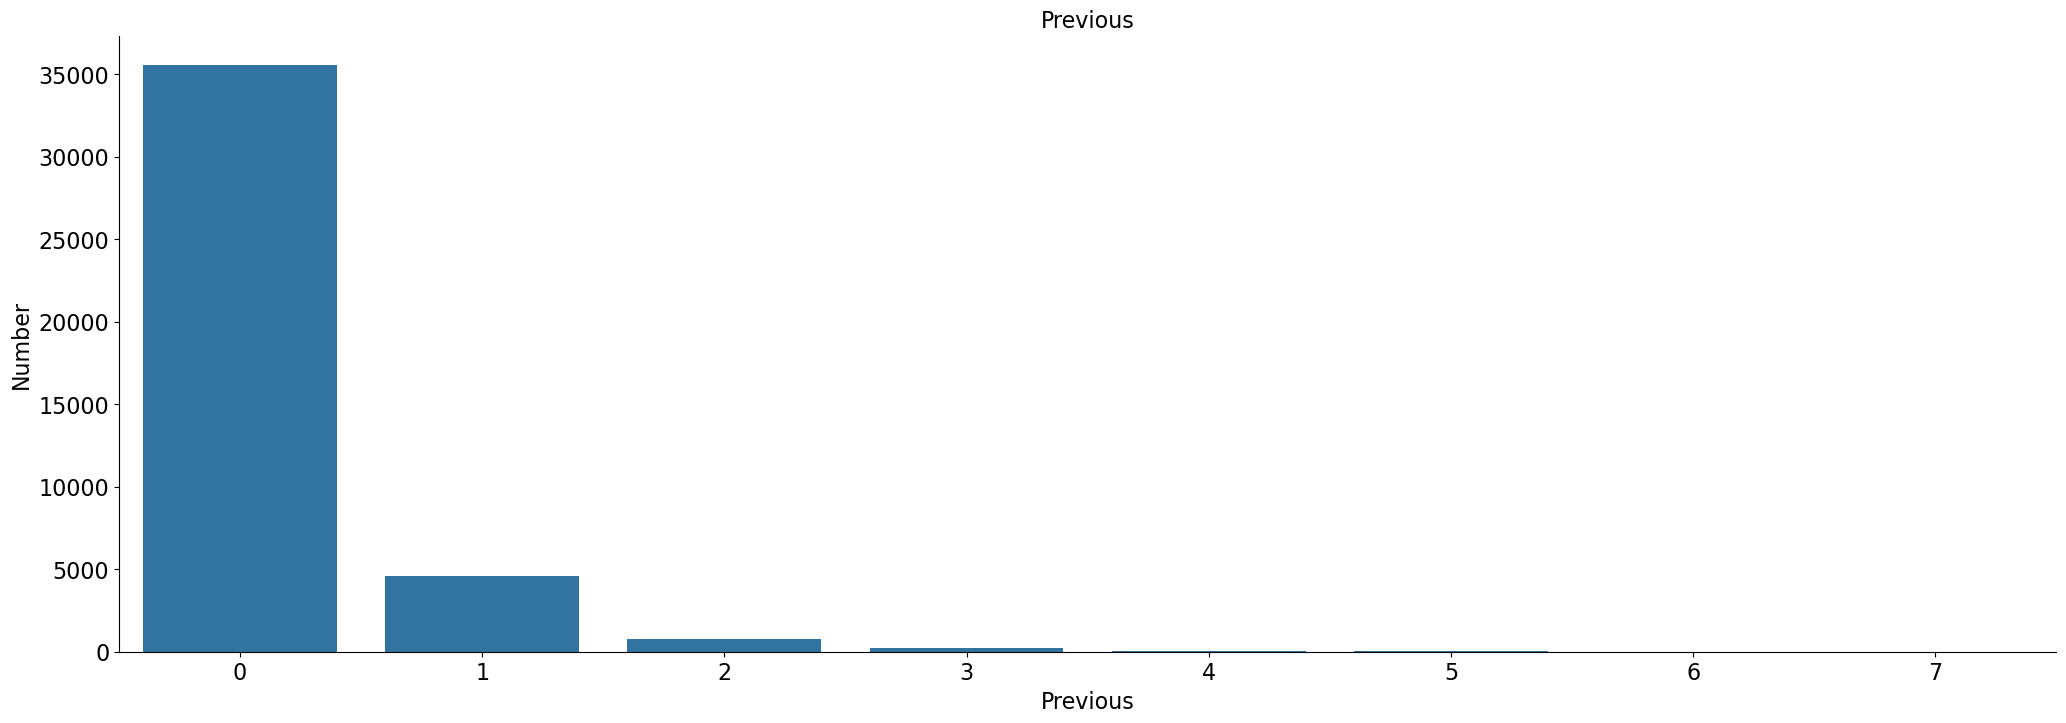

In [16]:
# This code creates a count plot to visualise the distribution of the 'previous' variable,
# showing the number of occurrences for each category in the dataset.
plt.close() 
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x='previous', data=df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()
plt.show()

#previous: the number of contacts performed before this campaign for this client


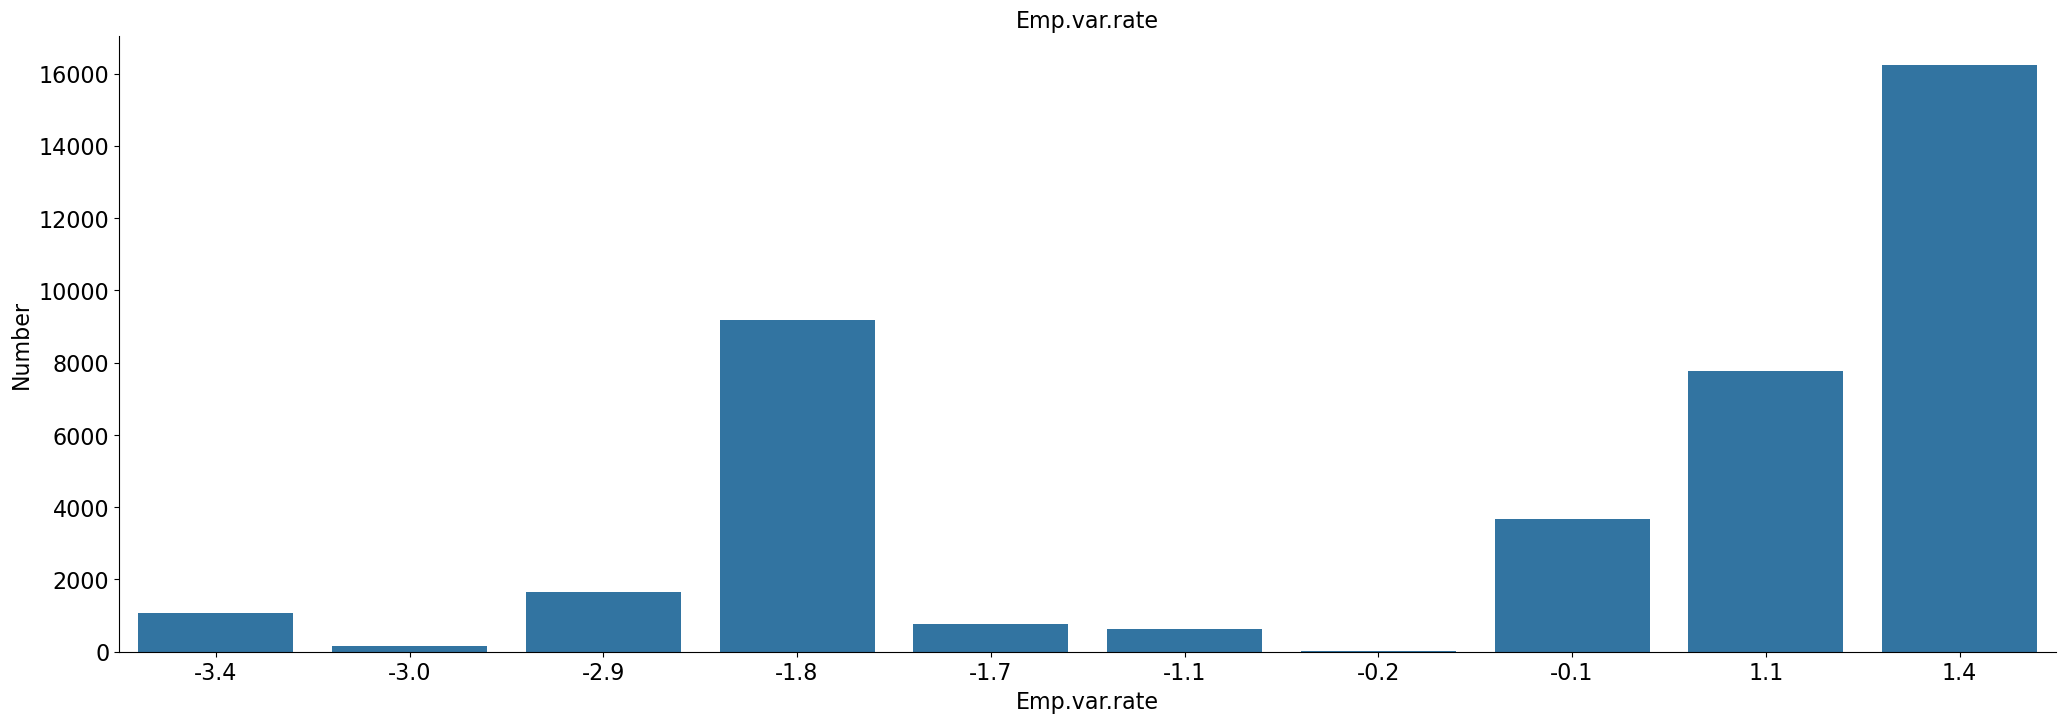

In [17]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()
plt.show()

# #emp.var.rate: employment variation rate - quarterly indicator (numeric)

#### Categorical Features

In [18]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [19]:
cols_new_cat = pd.get_dummies(df[cols_cat], drop_first = False)

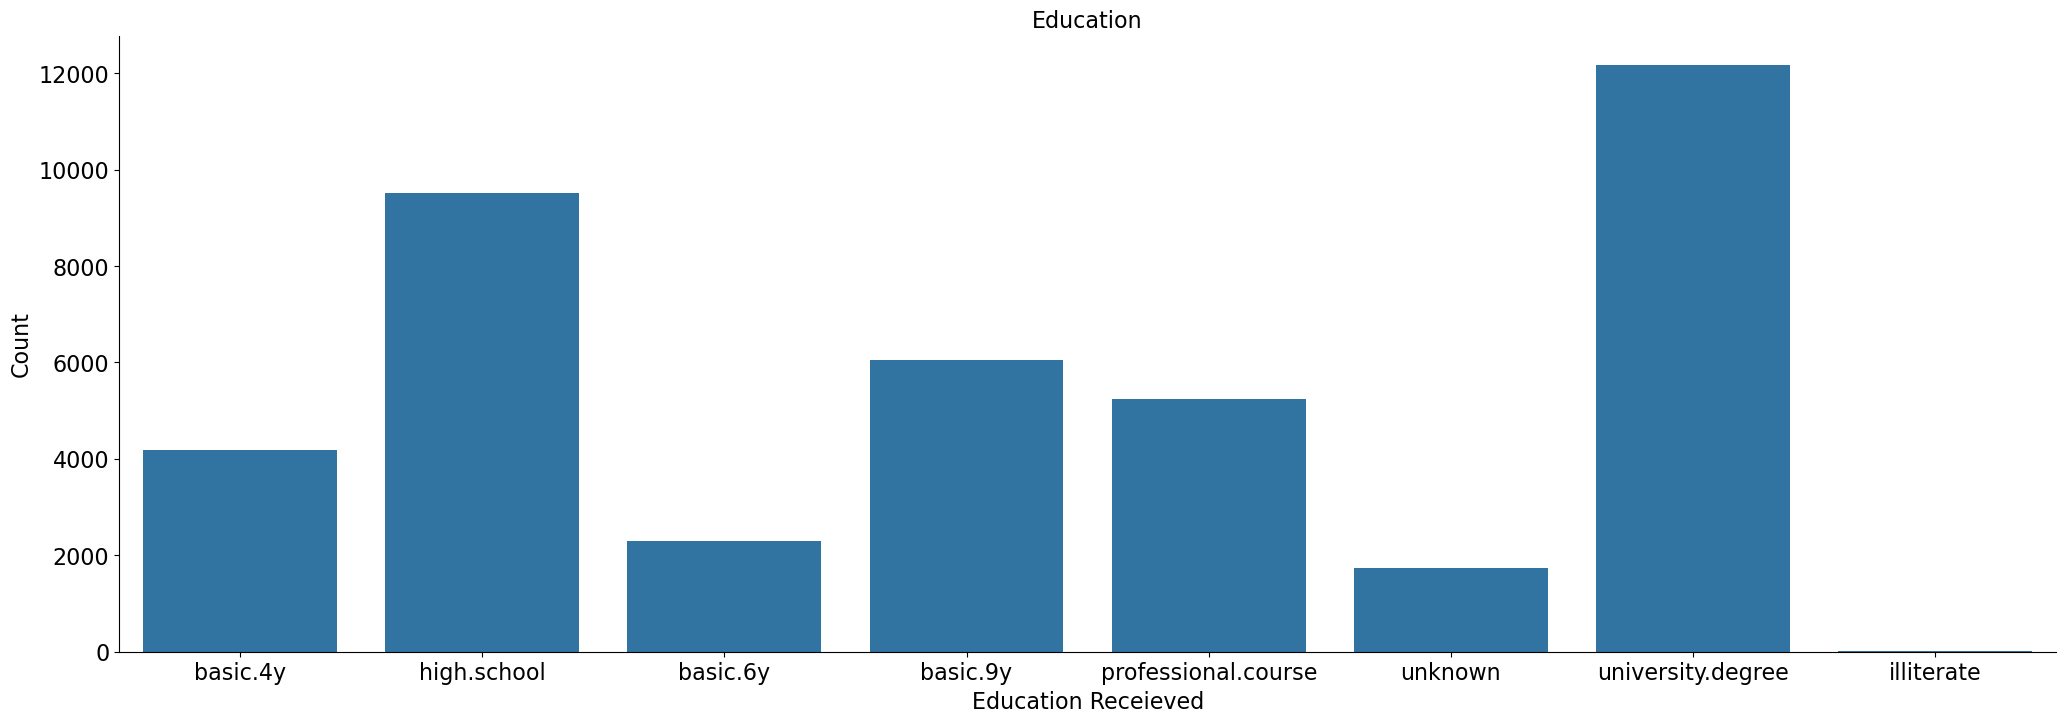

In [20]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()
plt.show()

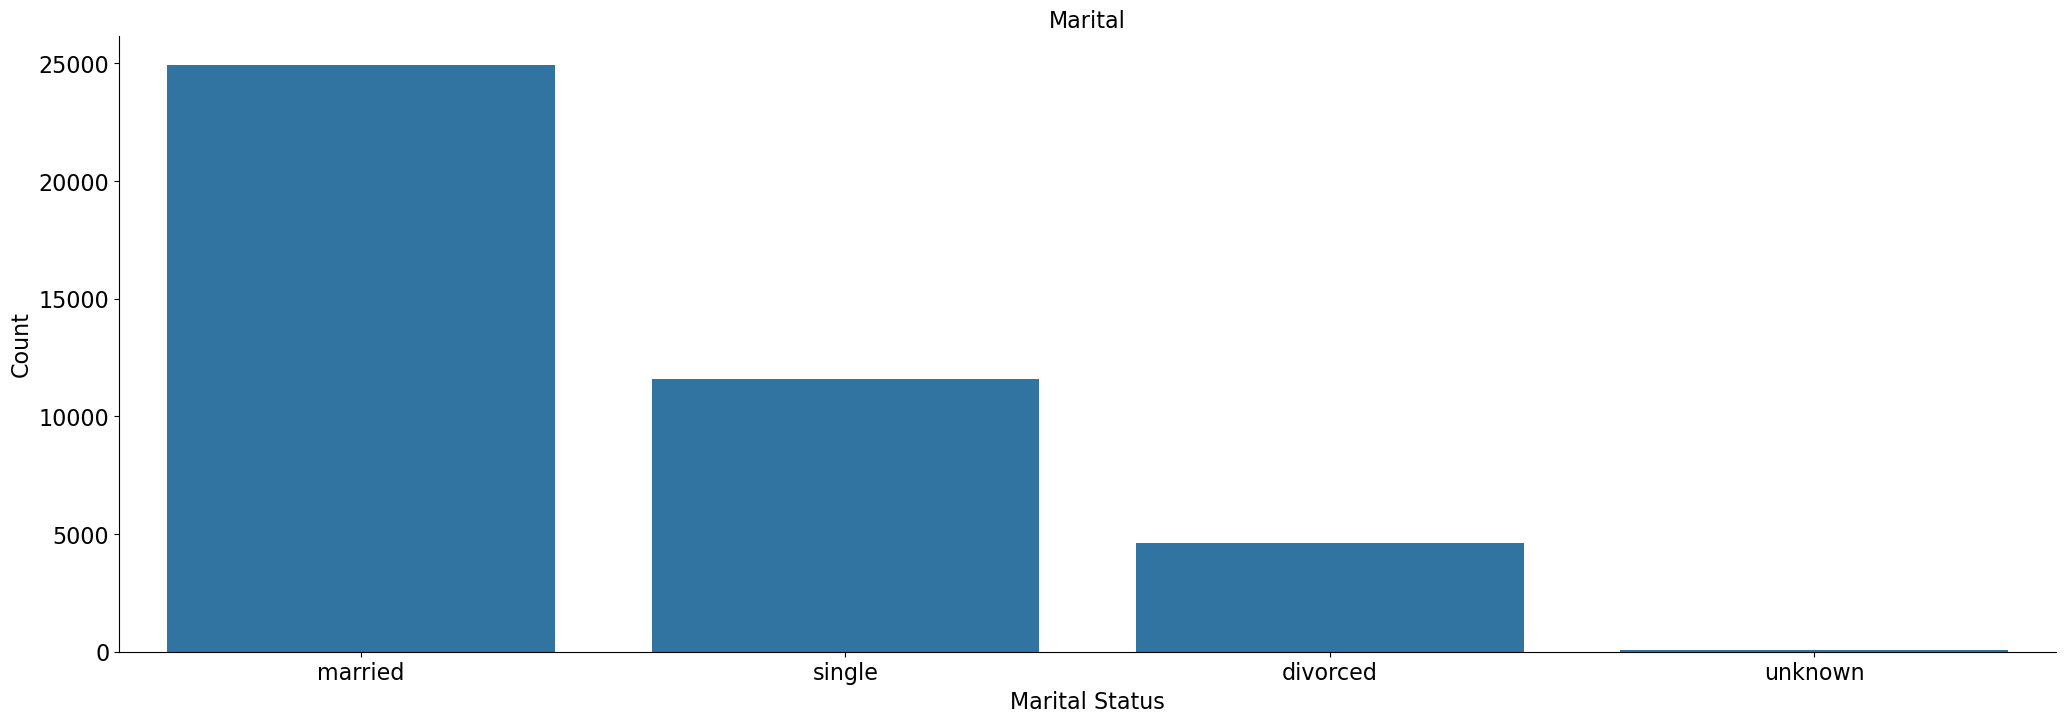

In [21]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()
plt.show()

From a marketing perspective, married individuals are a large customer base to target


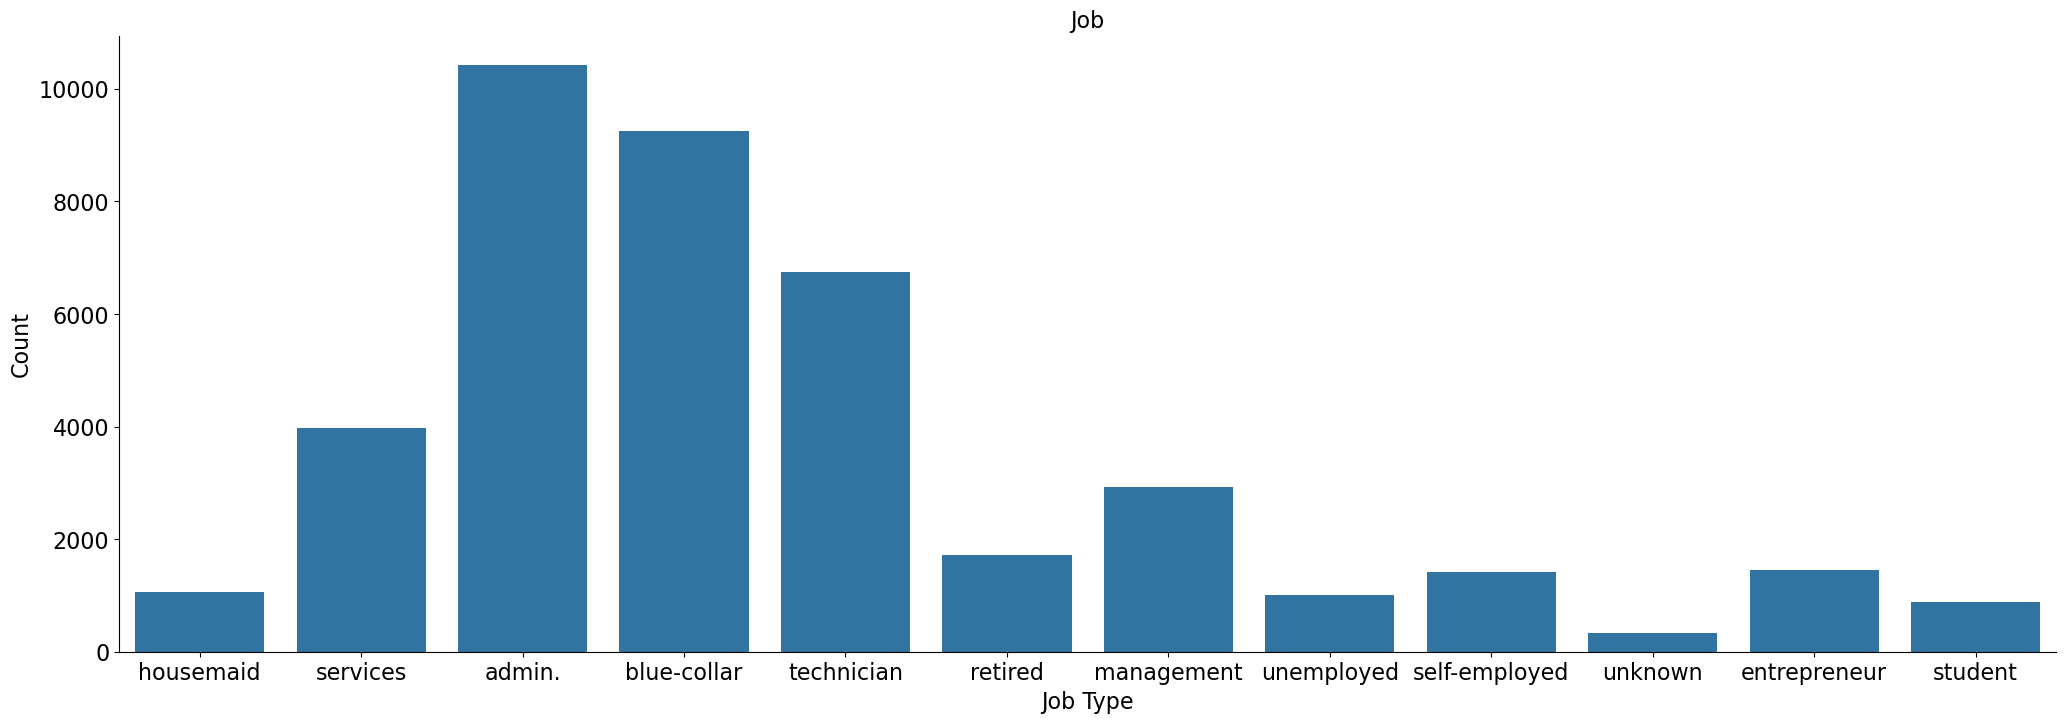

In [22]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Job Type', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()
plt.show()

Marketing: Large customer base are admin/blue-collar roles

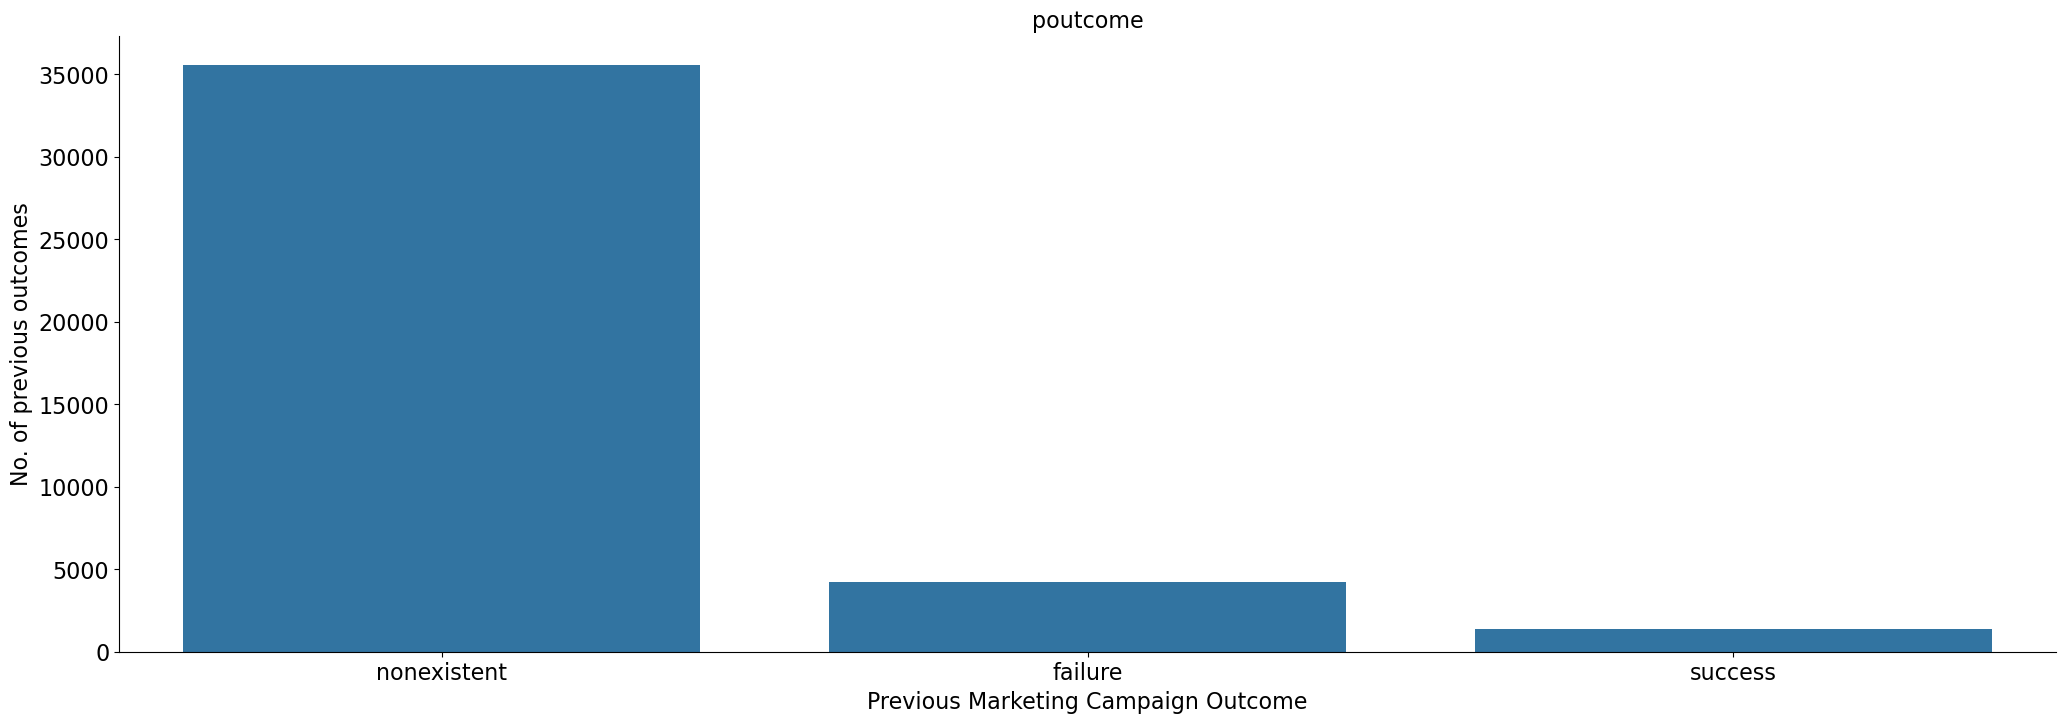

In [23]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('No. of previous outcomes', fontsize=16)
ax.set_title('poutcome', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()
plt.show()

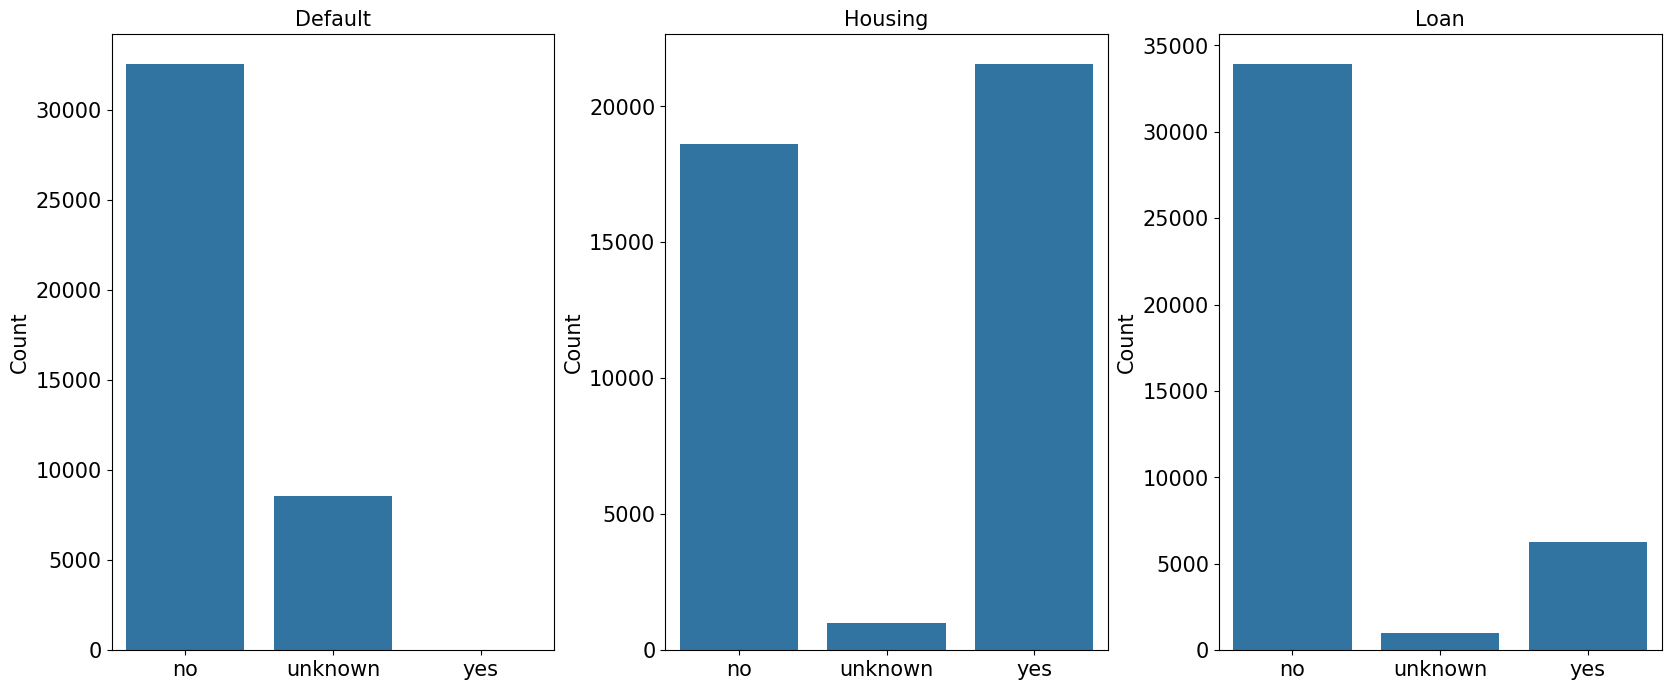

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

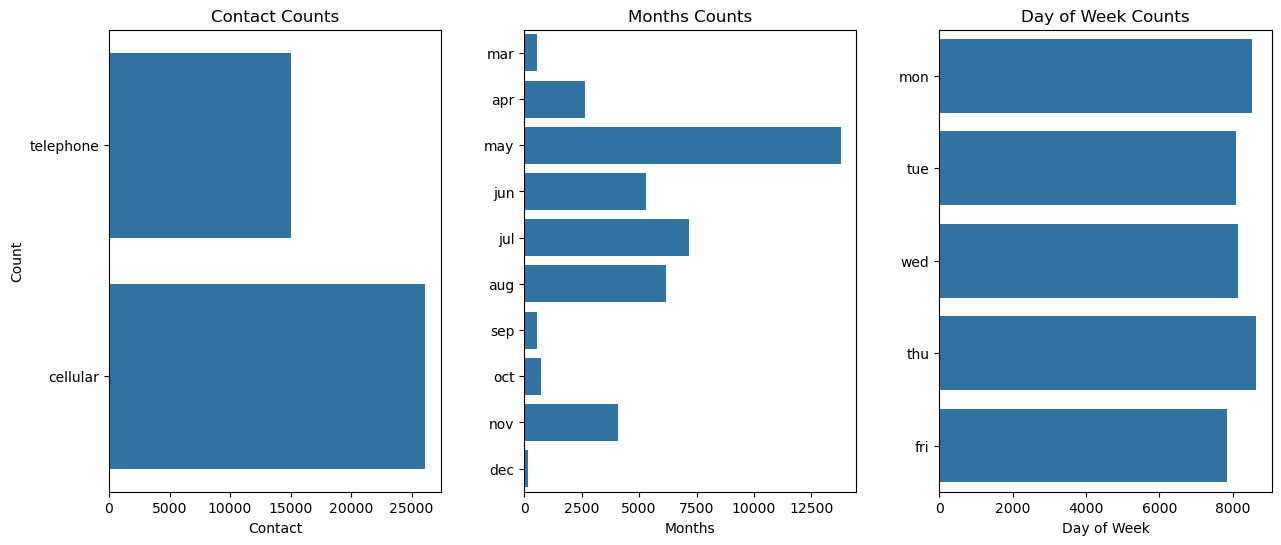

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

### Feature Engineering